<a href="https://colab.research.google.com/github/mehrdadkazemi254/MachineLearning/blob/main/Chapter4_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [26]:
from sklearn import datasets
iris = datasets.load_iris(as_frame= True, )
iris

{'DESCR': '.. _iris_dataset:\n\nIris plants dataset\n--------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n                \n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)\n    ===========

In [42]:
df= pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                 columns= iris['feature_names'] + ['target'])
df.head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [68]:
X = np.array(df.iloc[:,3]).reshape(-1,1)
y = (df['target'] == 2).astype(np.int)

In [69]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X,y)

LogisticRegression()

In [91]:
X_new = np.linspace(0,3,1000).reshape(-1,1)
y_prob = log_reg.predict_proba(X_new)
y_pred = log_reg.predict(X_new)
print(type(y_prob))
print(y_prob.shape)
# y_prob[:,1] #"Iris-Virginica"
# y_prob[:,0] #"Not Iris-Virginica"

<class 'numpy.ndarray'>
(1000, 2)


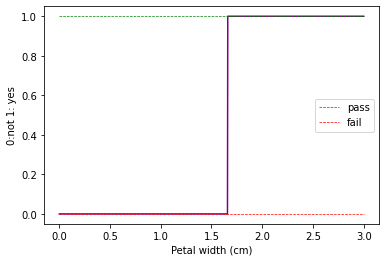

In [144]:
#plotting
plt.plot(X_new, y_pred, 'purple')
plt.plot([0,3],[1,1],'g--',label='pass',linewidth=0.7)
plt.plot([0,3],[0,0],'r--',label='fail',linewidth=0.7)
plt.xlabel('Petal width (cm)')
plt.ylabel('0:not 1: yes')
plt.legend(loc='best')
plt.show()

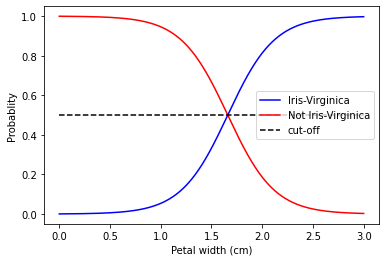

In [136]:
plt.plot(X_new, y_prob[:,1], 'b-' ,label="Iris-Virginica")
plt.plot(X_new, y_prob[:,0], 'r-' ,label="Not Iris-Virginica")
plt.plot([0,3],[0.5,0.5],'k--',label='cut-off')
plt.legend(loc='best')
plt.ylabel('Probablity')
plt.xlabel('Petal width (cm)')
plt.show()

In [119]:
log_reg.predict([[1.5],[1.6],[1.7]])

array([0, 0, 1])